# Analysis and Pre-processing data

In [1]:
import pandas as pd

#load the dataset
dataset = pd.read_csv('heart.csv')

In [2]:
dataset.head() #view first 5 rows of data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [3]:
# see data row and column
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dataset.shape

(918, 12)

In [4]:
# see data types of each column
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [5]:
#statistical summary
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,916.000000,915.000000,917.000000,918.000000,903.000000
mean,53.510893,132.396514,198.852620,0.232787,136.767721,0.887364,0.555925
std,9.432617,18.514154,109.193372,0.422839,25.442922,1.066570,0.497138
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# any null-values?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     916 non-null    float64
 5   FastingBS       915 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    903 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [7]:
# drop null values row
dataset.dropna(inplace=True)
# and show again the shape of dataset
dataset.shape

(897, 12)

In [8]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a
import matplotlib.pyplot as plt # generate charts
%matplotlib inline

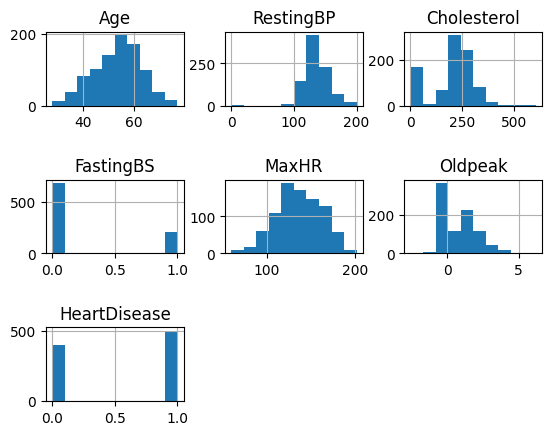

In [9]:
dataset.hist() #histogram
plt.subplots_adjust(hspace=1.0) #dont let diagrams cross over
plt.show()

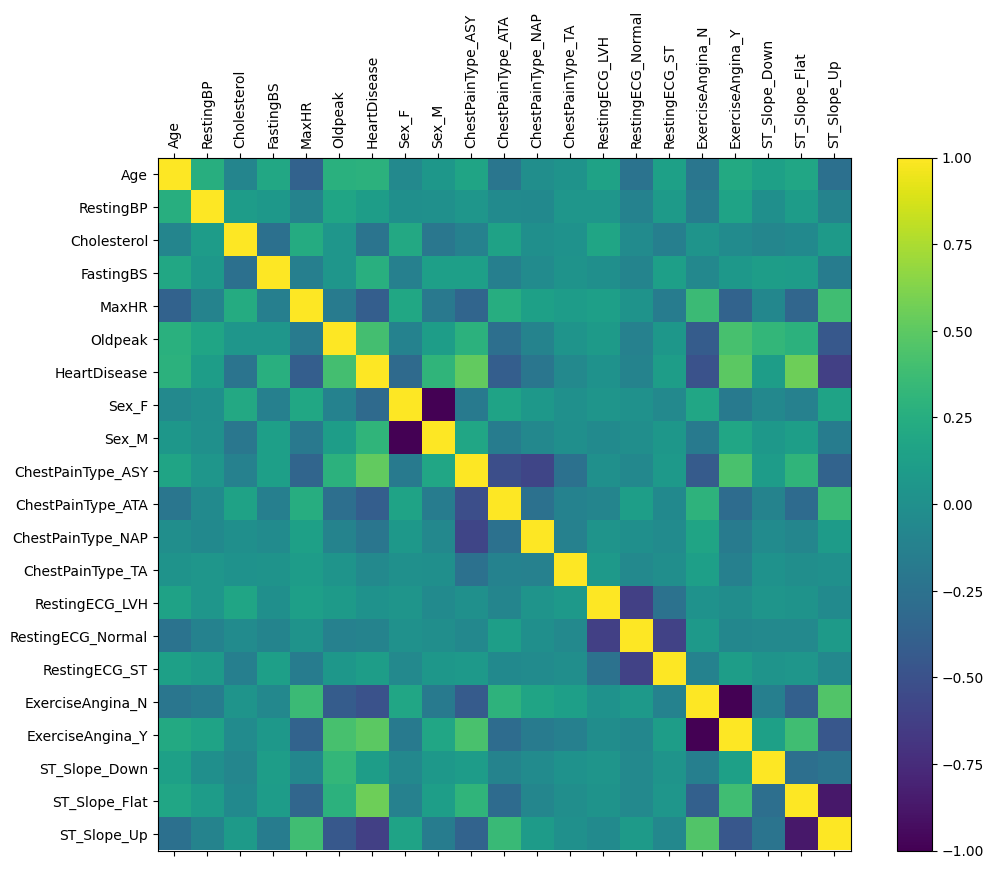

In [10]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a

# Step 1: Perform one-hot encoding for all categorical columns
encoded_dataset = pd.get_dummies(dataset)

# Step 2: Compute the correlation matrix
correlations = encoded_dataset.corr()

# Step 3: Plot the correlation matrix as a heatmap
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set the labels for the axes
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.show()

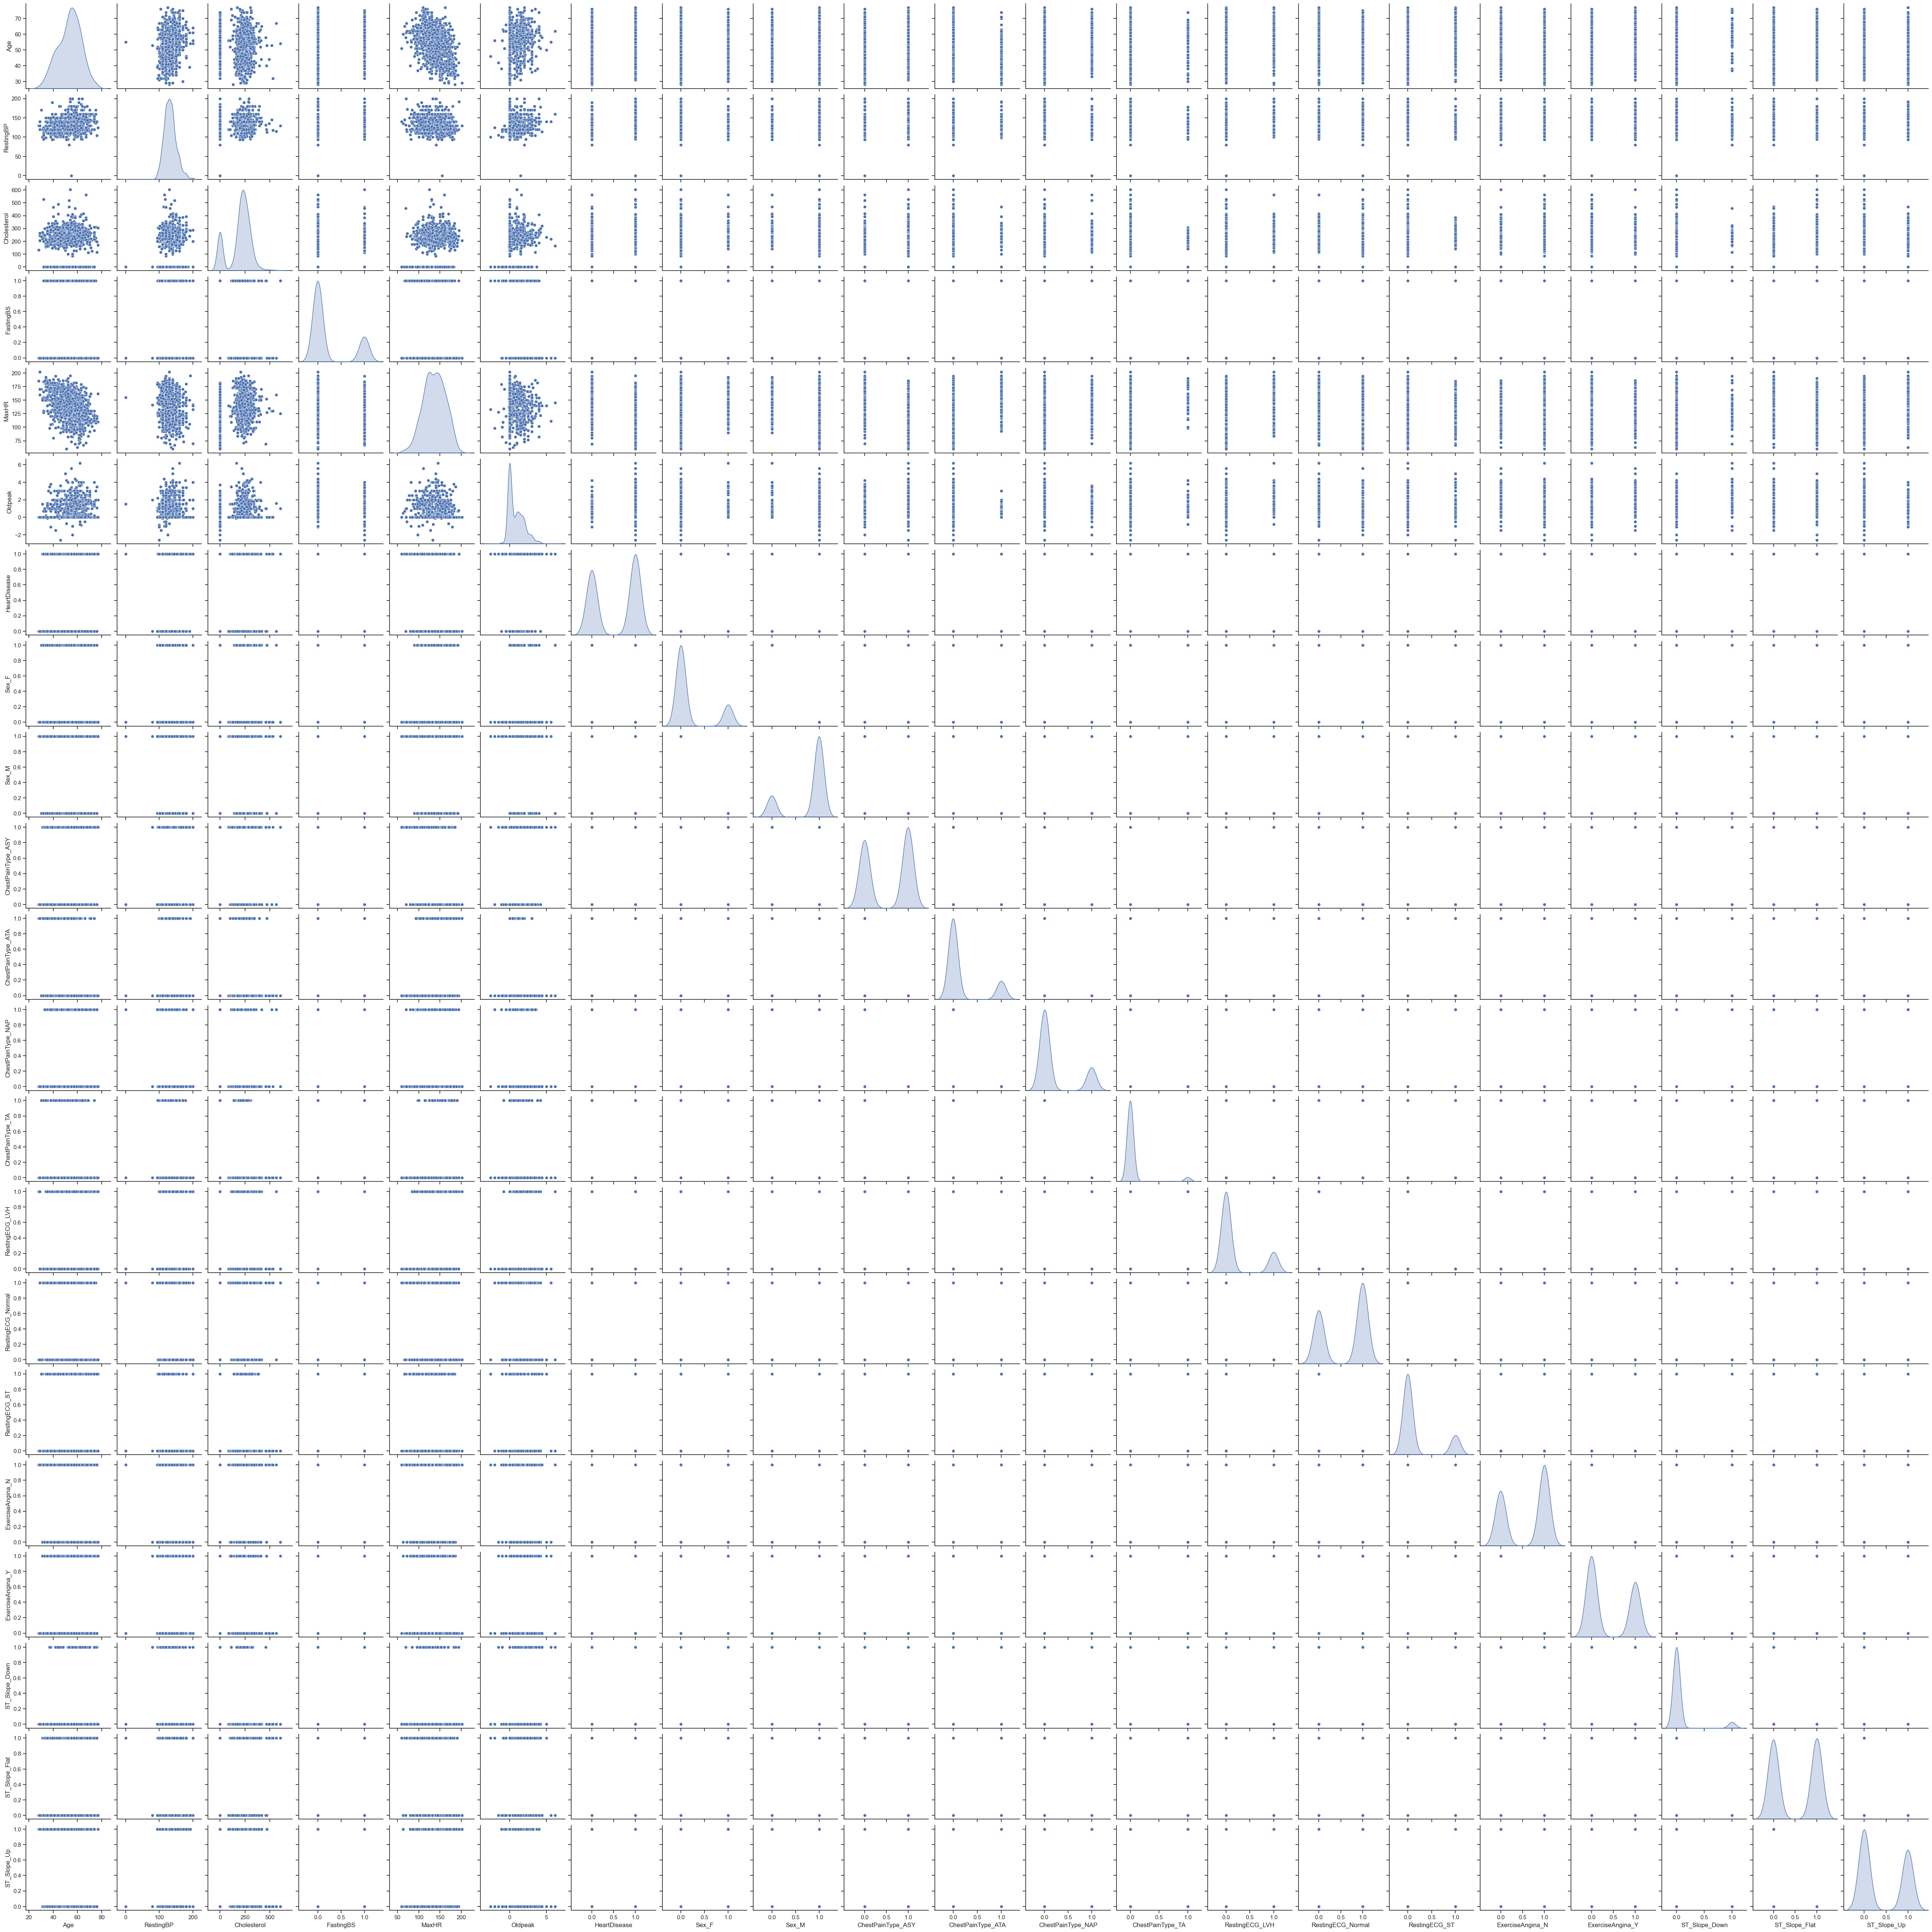

In [11]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(encoded_dataset, diag_kind="kde")

plt.show()